In [1]:
!pip install ultralytics

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.



  Using cached ultralytics-8.3.107-py3-none-any.whl.metadata (37 kB)
  Using cached numpy-2.1.1-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached torch-2.6.0-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.21.0-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached ultralytics-8.3.107-py3-none-any.whl (974 kB)
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   -------------

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video

In [3]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [5]:
model = YOLO('yolov8n.pt')

In [1]:
import os
import yaml
dataset_path = 'Vehicle_Detection_Image_Dataset'
yaml_file_path = os.path.join(dataset_path, 'data.yaml')
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- Vehicle
nc: 1
roboflow:
  license: CC BY 4.0
  project: vehicle_detection_yolov8
  url: https://universe.roboflow.com/farzad/vehicle_detection_yolov8/dataset/3
  version: 3
  workspace: farzad
train: C:/Users/SRIRAM\OneDrive\Desktop/ve/ve/Vehicle_Detection_Image_Dataset/train
val: C:/Users/SRIRAM\OneDrive\Desktop/ve/ve/Vehicle_Detection_Image_Dataset/valid



In [3]:
from PIL import Image
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')
num_train_images = 0
num_valid_images = 0
train_image_sizes = set()
valid_image_sizes = set()
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):  
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)
for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'): 
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 536
Number of validation images: 90
All training images have the same size: (640, 640)
All validation images have the same size: (640, 640)


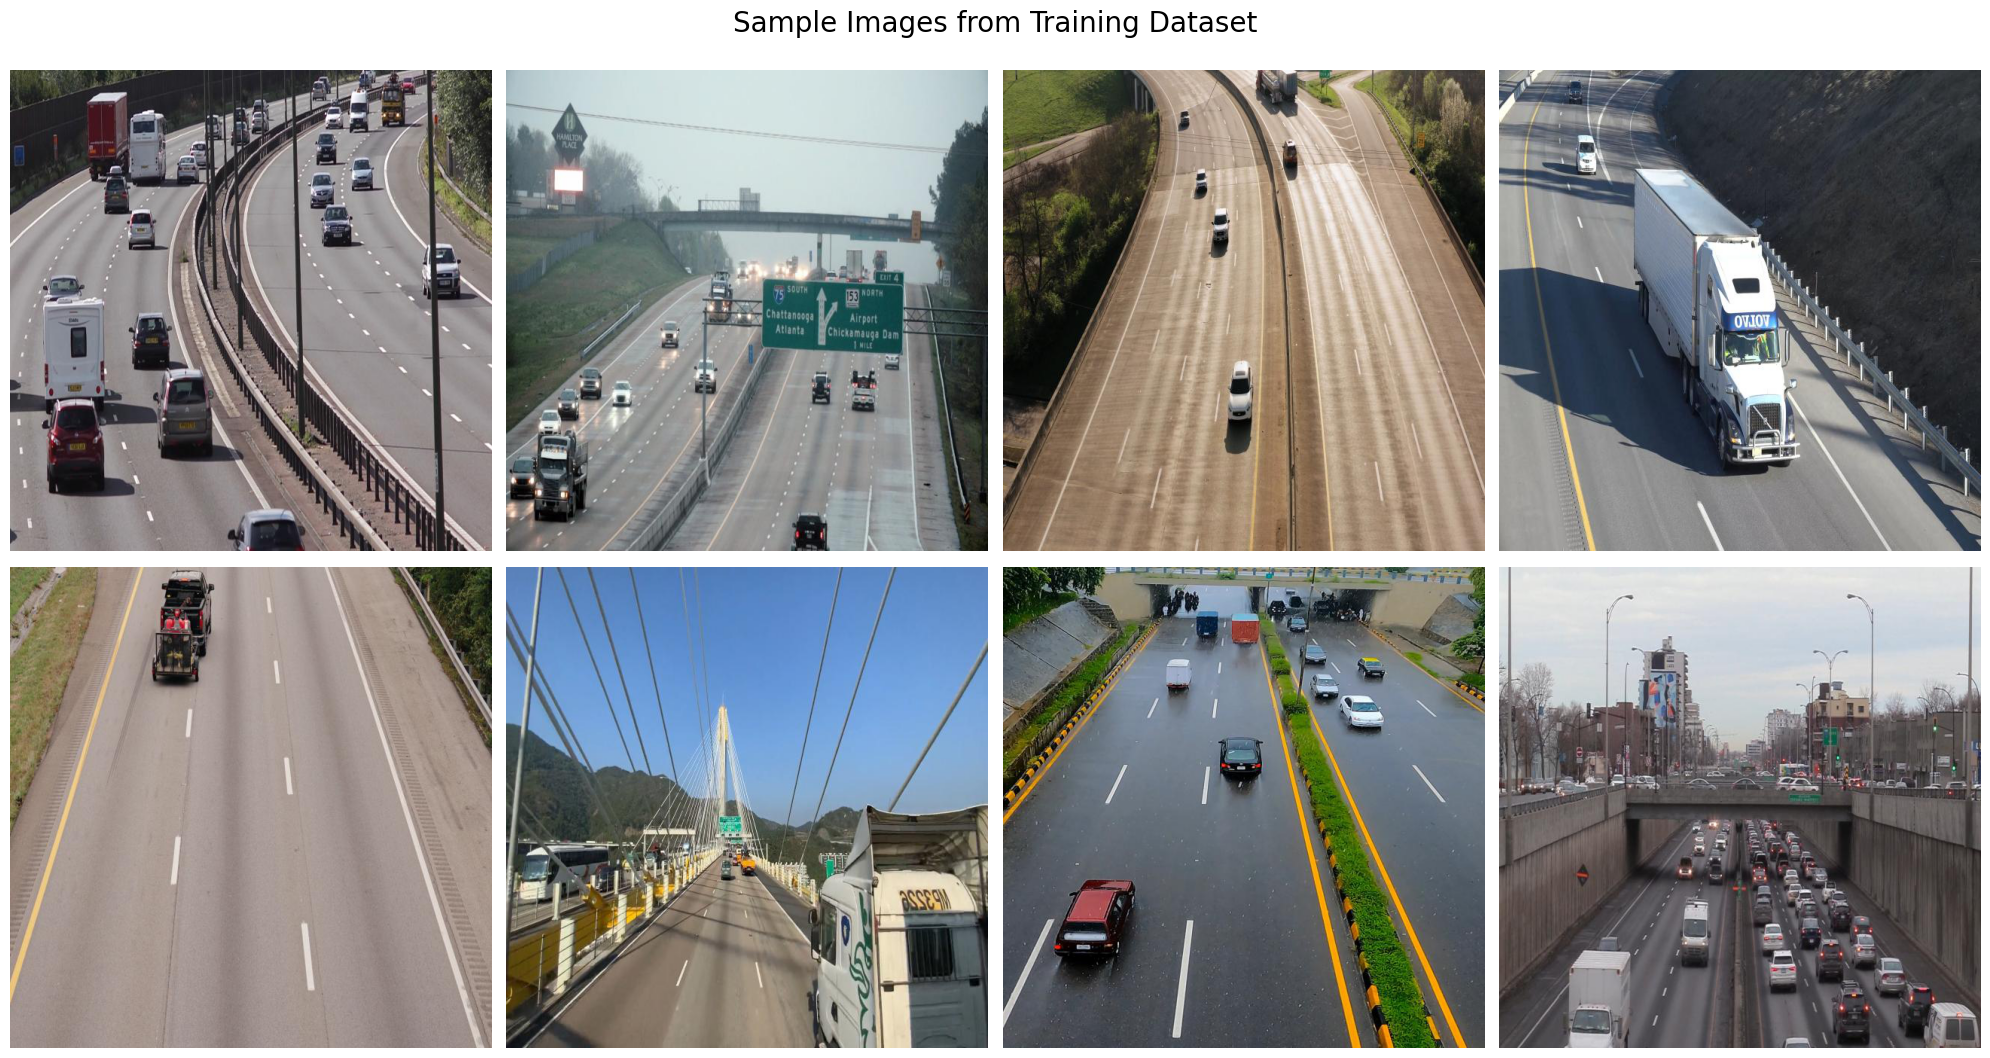

In [5]:
import matplotlib.pyplot as plt
image_files = [file for file in os.listdir(train_images_path) if file.endswith('.jpg')]
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 8)]
fig, axes = plt.subplots(2, 4, figsize=(20, 11))
for ax, img_file in zip(axes.ravel(), selected_images):
    img_path = os.path.join(train_images_path, img_file)
    image = Image.open(img_path)
    ax.imshow(image)
    ax.axis('off')  
plt.suptitle('Sample Images from Training Dataset', fontsize=20)
plt.tight_layout()
plt.show()

In [9]:
# Train the model on our custom dataset
results = model.train(
    data=yaml_file_path,     # Path to the dataset configuration file
    epochs=100,              # Number of epochs to train for
    imgsz=640,               # Size of input images as integer
    device=0,                # Device to run on, i.e. cuda device=0 
    patience=50,             # Epochs to wait for no observable improvement for early stopping of training
    batch=32,                # Number of images per batch
    optimizer='auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
    lr0=0.0001,              # Initial learning rate 
    lrf=0.1,                 # Final learning rate (lr0 * lrf)
    dropout=0.1,             # Use dropout regularization
    seed=0                   # Random seed for reproducibility
)

Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, epochs=100, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

100%|██████████| 755k/755k [00:00<00:00, 39.1MB/s]
2024-01-07 16:41:44,620	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-07 16:41:45,256	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/train/labels... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:01<00:00, 466.66it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 467.59it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.79G      2.425      2.954      1.851        346        640: 100%|██████████| 17/17 [00:11<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all         90        937     0.0116      0.333     0.0363      0.015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.96G       1.52      1.307      1.195        337        640: 100%|██████████| 17/17 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


                   all         90        937      0.824      0.274       0.37      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.62G      1.284      1.006      1.069        265        640: 100%|██████████| 17/17 [00:05<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         90        937      0.808      0.666      0.725      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.69G      1.222     0.9142      1.043        431        640: 100%|██████████| 17/17 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         90        937      0.826      0.828      0.881      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.68G      1.184     0.8675      1.028        289        640: 100%|██████████| 17/17 [00:05<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         90        937      0.837       0.88      0.913       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.97G      1.161     0.8298      1.017        314        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


                   all         90        937      0.855      0.863      0.928      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.77G      1.153     0.7692      1.007        357        640: 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


                   all         90        937      0.861      0.906      0.942      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.62G      1.124     0.7554      1.001        386        640: 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


                   all         90        937      0.875       0.89      0.944      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.72G      1.106     0.7108      0.991        397        640: 100%|██████████| 17/17 [00:05<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         90        937      0.829       0.92      0.927      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.85G      1.119     0.7057     0.9882        231        640: 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         90        937      0.868      0.895       0.95      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.87G      1.067     0.6929      0.985        301        640: 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         90        937        0.9      0.885      0.949      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.76G      1.078     0.6878     0.9755        450        640: 100%|██████████| 17/17 [00:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         90        937      0.883      0.918      0.944      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       4.7G      1.081     0.6589     0.9763        398        640: 100%|██████████| 17/17 [00:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         90        937      0.902      0.913      0.963       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.74G      1.092     0.6557     0.9754        327        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]


                   all         90        937      0.891      0.902      0.958      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.45G       1.07     0.6433     0.9647        317        640: 100%|██████████| 17/17 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         90        937        0.9      0.915      0.965      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.01G      1.051     0.6295     0.9685        262        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         90        937      0.908      0.924      0.965      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.71G      1.051     0.6266     0.9611        256        640: 100%|██████████| 17/17 [00:05<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         90        937      0.899      0.905      0.955      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.78G      1.056     0.6294     0.9622        358        640: 100%|██████████| 17/17 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         90        937      0.876      0.912      0.949      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.69G      1.024     0.6021     0.9606        360        640: 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


                   all         90        937      0.885      0.933      0.957      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.74G      1.028     0.6044     0.9583        416        640: 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         90        937      0.911      0.926      0.967      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.86G       1.03     0.5858      0.962        439        640: 100%|██████████| 17/17 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         90        937      0.903      0.916      0.969      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.98G      1.044     0.5982     0.9662        309        640: 100%|██████████| 17/17 [00:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         90        937       0.93      0.904       0.97      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.73G      1.023     0.5817     0.9578        350        640: 100%|██████████| 17/17 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         90        937      0.918      0.902      0.966      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       5.3G      1.017     0.5816     0.9535        345        640: 100%|██████████| 17/17 [00:05<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         90        937      0.913       0.92      0.972      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.84G      1.003     0.5823     0.9536        406        640: 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         90        937      0.864      0.925      0.955      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.66G     0.9943     0.5592     0.9488        353        640: 100%|██████████| 17/17 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         90        937      0.924      0.908      0.966        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.61G      1.016     0.5661      0.955        338        640: 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         90        937      0.908      0.905       0.97      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.97G     0.9917     0.5582     0.9459        345        640: 100%|██████████| 17/17 [00:05<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         90        937      0.926       0.92      0.973      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.11G      0.995     0.5612     0.9475        274        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         90        937        0.9      0.942      0.971      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.62G     0.9951     0.5542     0.9441        278        640: 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         90        937      0.925      0.916      0.971      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.58G      1.001     0.5546     0.9515        228        640: 100%|██████████| 17/17 [00:05<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         90        937      0.902      0.919      0.963      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.63G     0.9758     0.5479     0.9414        319        640: 100%|██████████| 17/17 [00:05<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         90        937      0.893      0.925      0.966      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.67G     0.9796     0.5417     0.9428        354        640: 100%|██████████| 17/17 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         90        937      0.907      0.933      0.967      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.72G     0.9873      0.537     0.9503        363        640: 100%|██████████| 17/17 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         90        937      0.919      0.927      0.975      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.98G     0.9683      0.533     0.9408        246        640: 100%|██████████| 17/17 [00:05<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         90        937      0.913      0.911      0.962      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.99G     0.9748     0.5327     0.9378        527        640: 100%|██████████| 17/17 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         90        937      0.901      0.923      0.966      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.75G     0.9693     0.5359     0.9378        292        640: 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         90        937      0.896      0.916      0.964      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.65G     0.9583     0.5334     0.9394        490        640: 100%|██████████| 17/17 [00:05<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         90        937      0.896      0.932      0.971      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       4.5G     0.9547     0.5224     0.9385        452        640: 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         90        937      0.912      0.935      0.972      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.71G     0.9547     0.5245     0.9347        297        640: 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         90        937      0.888      0.953      0.973      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.66G     0.9696     0.5259     0.9346        306        640: 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


                   all         90        937      0.895      0.926      0.969      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.61G     0.9426     0.5224     0.9316        287        640: 100%|██████████| 17/17 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         90        937      0.914      0.924      0.971      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.36G     0.9375     0.5111      0.929        354        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         90        937      0.918      0.928      0.971      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         5G     0.9599     0.5312     0.9331        246        640: 100%|██████████| 17/17 [00:05<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         90        937      0.924      0.921       0.96      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.97G     0.9537     0.5249     0.9356        261        640: 100%|██████████| 17/17 [00:05<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         90        937      0.913      0.935       0.97      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.45G      0.935     0.5044     0.9314        430        640: 100%|██████████| 17/17 [00:05<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


                   all         90        937      0.906      0.911      0.965      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.52G     0.9302     0.5062     0.9276        278        640: 100%|██████████| 17/17 [00:05<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         90        937      0.899      0.925      0.974      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.03G     0.9238     0.5081     0.9222        424        640: 100%|██████████| 17/17 [00:05<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]


                   all         90        937      0.906      0.934      0.973       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.42G     0.9358     0.5066     0.9261        312        640: 100%|██████████| 17/17 [00:05<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         90        937      0.909      0.941      0.975      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       4.7G     0.9285     0.5042     0.9285        406        640: 100%|██████████| 17/17 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         90        937      0.915      0.933      0.972      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.96G     0.9298     0.5028     0.9241        314        640: 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         90        937      0.913      0.933      0.964      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.76G     0.9209     0.4958     0.9229        297        640: 100%|██████████| 17/17 [00:05<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         90        937      0.915      0.921       0.97      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.45G     0.9104     0.4897      0.923        428        640: 100%|██████████| 17/17 [00:05<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


                   all         90        937      0.926      0.938      0.976      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.53G     0.9119     0.4918     0.9241        252        640: 100%|██████████| 17/17 [00:05<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         90        937      0.889      0.937      0.969      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.74G     0.9048     0.4931     0.9225        328        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         90        937      0.915      0.933      0.975       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.46G     0.9048     0.4883     0.9224        275        640: 100%|██████████| 17/17 [00:05<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         90        937      0.902       0.95       0.97      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.93G     0.9165     0.4865     0.9252        356        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         90        937      0.911      0.927      0.972      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.64G     0.9052     0.4828     0.9186        433        640: 100%|██████████| 17/17 [00:05<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         90        937      0.908      0.938      0.962      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.65G     0.9169     0.4879     0.9203        278        640: 100%|██████████| 17/17 [00:05<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         90        937      0.905      0.939      0.963      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.01G      0.895     0.4805      0.917        340        640: 100%|██████████| 17/17 [00:05<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


                   all         90        937      0.903      0.941      0.971      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.24G     0.8996     0.4814     0.9162        325        640: 100%|██████████| 17/17 [00:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         90        937      0.916      0.935      0.976      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.33G     0.8956     0.4744     0.9197        264        640: 100%|██████████| 17/17 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         90        937      0.918      0.935      0.973      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.68G     0.8935     0.4848      0.921        266        640: 100%|██████████| 17/17 [00:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         90        937       0.91      0.924      0.971      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.73G     0.8892     0.4743      0.918        339        640: 100%|██████████| 17/17 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         90        937      0.918      0.933      0.968      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.72G     0.8905     0.4672     0.9155        454        640: 100%|██████████| 17/17 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         90        937      0.902      0.931      0.972      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.93G     0.8875     0.4745     0.9111        416        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         90        937      0.918      0.935      0.975      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.75G     0.8859     0.4672     0.9137        308        640: 100%|██████████| 17/17 [00:05<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         90        937      0.918      0.931      0.966      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.65G     0.8855     0.4664     0.9128        377        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         90        937      0.889      0.957      0.974      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.71G       0.87     0.4551     0.9136        441        640: 100%|██████████| 17/17 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         90        937      0.915      0.936      0.968       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.64G     0.8794     0.4618     0.9098        304        640: 100%|██████████| 17/17 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         90        937      0.916       0.93      0.973      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.43G     0.8807     0.4601     0.9169        245        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         90        937      0.932      0.906      0.971      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.68G     0.8728     0.4681     0.9126        371        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         90        937        0.9      0.962      0.968      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.62G     0.8676      0.463     0.9095        330        640: 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         90        937      0.918      0.946      0.976      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.74G     0.8671     0.4586      0.912        306        640: 100%|██████████| 17/17 [00:05<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         90        937      0.927      0.932      0.978      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       4.5G     0.8683     0.4567     0.9102        262        640: 100%|██████████| 17/17 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


                   all         90        937      0.916      0.938      0.975      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.63G     0.8832     0.4594     0.9126        234        640: 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]


                   all         90        937        0.9      0.939      0.972      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.74G     0.8631     0.4534     0.9085        358        640: 100%|██████████| 17/17 [00:05<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]


                   all         90        937      0.912      0.948      0.969      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.66G     0.8734     0.4499     0.9109        340        640: 100%|██████████| 17/17 [00:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         90        937      0.887      0.952      0.971      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.75G     0.8584      0.444     0.9088        292        640: 100%|██████████| 17/17 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


                   all         90        937      0.902      0.958      0.975       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.51G     0.8483     0.4413     0.9064        435        640: 100%|██████████| 17/17 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


                   all         90        937      0.907       0.95      0.974      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.32G     0.8461      0.438     0.9083        278        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         90        937       0.92      0.931      0.974      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.62G      0.865     0.4457      0.911        371        640: 100%|██████████| 17/17 [00:05<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         90        937      0.908       0.94       0.97      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.57G     0.8496      0.448      0.907        278        640: 100%|██████████| 17/17 [00:05<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         90        937      0.897      0.958      0.971      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.71G     0.8486     0.4417      0.907        299        640: 100%|██████████| 17/17 [00:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         90        937        0.9      0.946       0.97      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.94G     0.8551     0.4456     0.9086        311        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         90        937      0.915      0.941      0.976      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.67G     0.8485     0.4413     0.9086        324        640: 100%|██████████| 17/17 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         90        937      0.904      0.954      0.971       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.61G      0.835      0.441     0.9002        484        640: 100%|██████████| 17/17 [00:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         90        937      0.907      0.946      0.973      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.65G     0.8428     0.4404     0.9002        301        640: 100%|██████████| 17/17 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         90        937      0.897      0.956      0.971      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.71G     0.8337     0.4386     0.9065        305        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         90        937      0.913      0.954      0.975      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.64G     0.8443     0.4334     0.9103        306        640: 100%|██████████| 17/17 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         90        937      0.901      0.957      0.974      0.736


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         5G     0.8248     0.4126     0.9032        256        640: 100%|██████████| 17/17 [00:10<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         90        937      0.907      0.952      0.972      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       4.2G     0.8207     0.4113      0.894        236        640: 100%|██████████| 17/17 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]


                   all         90        937      0.907       0.95      0.975      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.21G     0.8053     0.4073     0.8963        204        640: 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         90        937      0.914      0.942      0.971      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       4.2G      0.808     0.4047     0.8981        245        640: 100%|██████████| 17/17 [00:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         90        937      0.907      0.947      0.973      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       4.2G     0.7995     0.4017     0.8938        233        640: 100%|██████████| 17/17 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


                   all         90        937      0.907      0.949      0.972      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.28G     0.7962     0.3988     0.8953        205        640: 100%|██████████| 17/17 [00:05<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         90        937      0.915      0.945      0.972      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.19G      0.798     0.3987     0.8936        186        640: 100%|██████████| 17/17 [00:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         90        937      0.905       0.95      0.972      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       4.3G     0.7961     0.3981     0.8909        180        640: 100%|██████████| 17/17 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         90        937      0.897       0.95      0.968      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       4.2G     0.7973      0.395     0.8977        284        640: 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         90        937      0.922      0.935      0.972      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.21G     0.7815     0.3911     0.8904        286        640: 100%|██████████| 17/17 [00:05<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         90        937      0.913      0.947      0.971      0.738



100 epochs completed in 0.209 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]


                   all         90        937      0.916      0.938      0.975      0.744
Speed: 2.0ms preprocess, 2.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [7]:
post_training_files_path = 've/runs/detect'


0: 448x640 11 cars, 1 truck, 177.9ms
Speed: 35.7ms preprocess, 177.9ms inference, 20.7ms postprocess per image at shape (1, 3, 448, 640)
0: 2534x3648 11 car, 1 truck, 436.9ms
Speed: 15.3ms preprocess, 436.9ms inference, 2.0ms postprocess per image at shape (2534, 3648, 3)

Total Detections: 12
High-Confidence Detections (≥ 0.5): 8
Detection Accuracy: 66.67%


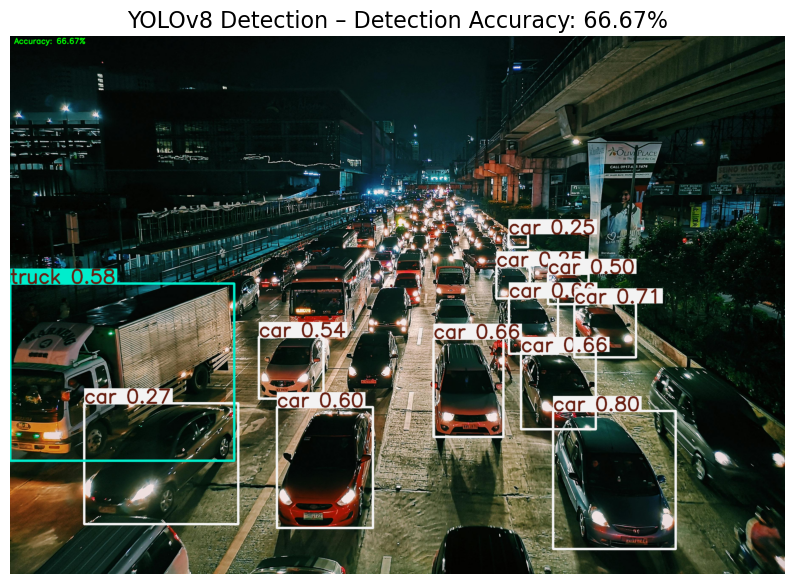

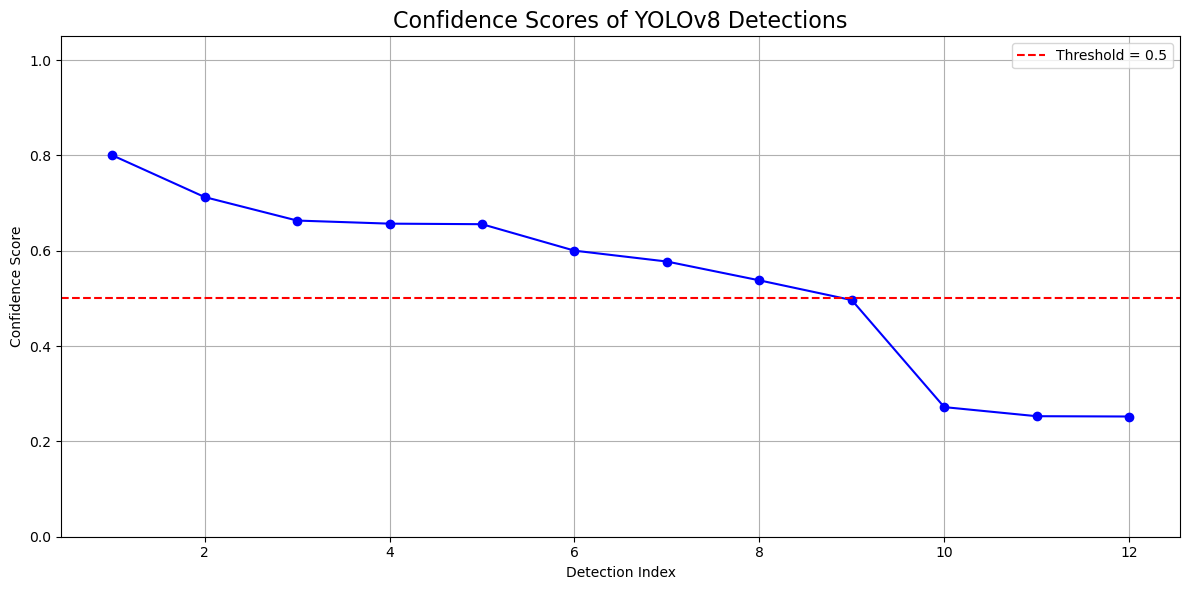

In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import Counter
model = YOLO("customyolov8.pt")
image_path = 'test_videos/sample.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
start_preprocess = time.time()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
end_preprocess = time.time()
start_inference = time.time()
results = model(image_rgb)
end_inference = time.time()
start_postprocess = time.time()
result = results[0]
boxes = result.boxes
confidences = boxes.conf.cpu().numpy()
classes = boxes.cls.cpu().numpy().astype(int)
end_postprocess = time.time()
preprocess_time = (end_preprocess - start_preprocess) * 1000
inference_time = (end_inference - start_inference) * 1000
postprocess_time = (end_postprocess - start_postprocess) * 1000
class_names = model.names
class_counts = Counter([class_names[c] for c in classes])
detection_summary = ", ".join([f"{v} {k}" for k, v in class_counts.items()])
print(f"0: {image.shape[0]}x{image.shape[1]} {detection_summary}, {inference_time:.1f}ms")
print(f"Speed: {preprocess_time:.1f}ms preprocess, {inference_time:.1f}ms inference, {postprocess_time:.1f}ms postprocess per image at shape {image_rgb.shape}")
threshold = 0.5
high_confidence = np.sum(confidences >= threshold)
total_detections = len(confidences)
accuracy = high_confidence / total_detections if total_detections > 0 else 0
print(f"\nTotal Detections: {total_detections}")
print(f"High-Confidence Detections (≥ {threshold}): {high_confidence}")
print(f"Detection Accuracy: {accuracy * 100:.2f}%")
annotated_image = result.plot()
annotated_image_cv = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
text = f"Accuracy: {accuracy * 100:.2f}%"
cv2.putText(annotated_image_cv, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 3)
annotated_image_rgb = cv2.cvtColor(annotated_image_cv, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(annotated_image_rgb)
if total_detections > 0:
    plt.title(f"YOLOv8 Detection – Detection Accuracy: {accuracy * 100:.2f}%", fontsize=16)
else:
    plt.title("YOLOv8 Detection - No Detections Found")
plt.axis("off")
plt.show()
if total_detections > 0:
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, total_detections + 1), confidences, marker='o', linestyle='-', color='blue')
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
    plt.title("Confidence Scores of YOLOv8 Detections", fontsize=16)
    plt.xlabel("Detection Index")
    plt.ylabel("Confidence Score")
    plt.ylim(0, 1.05)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No detections to display in confidence graph.")


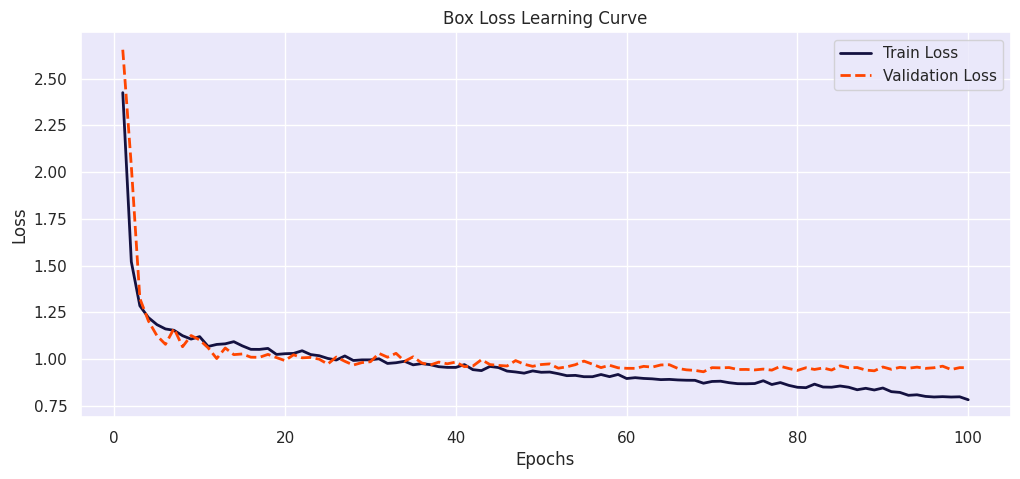

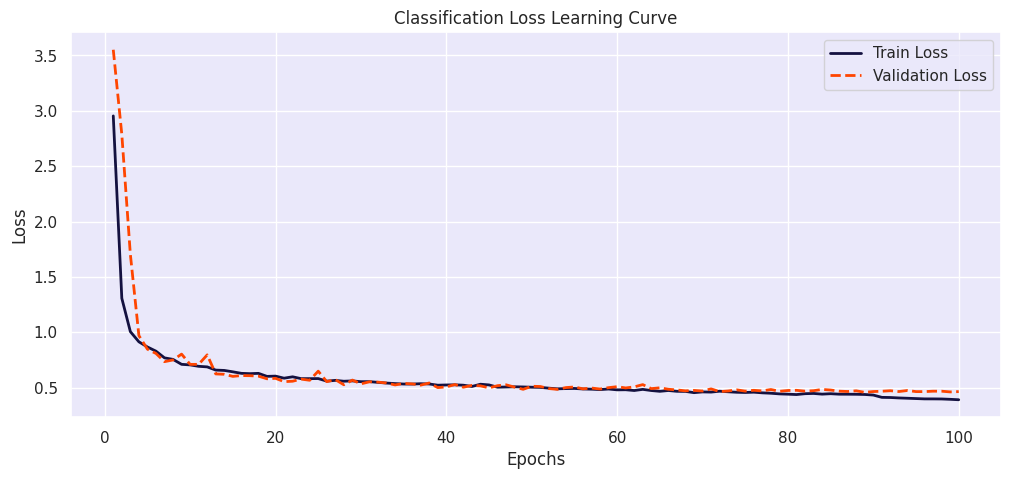

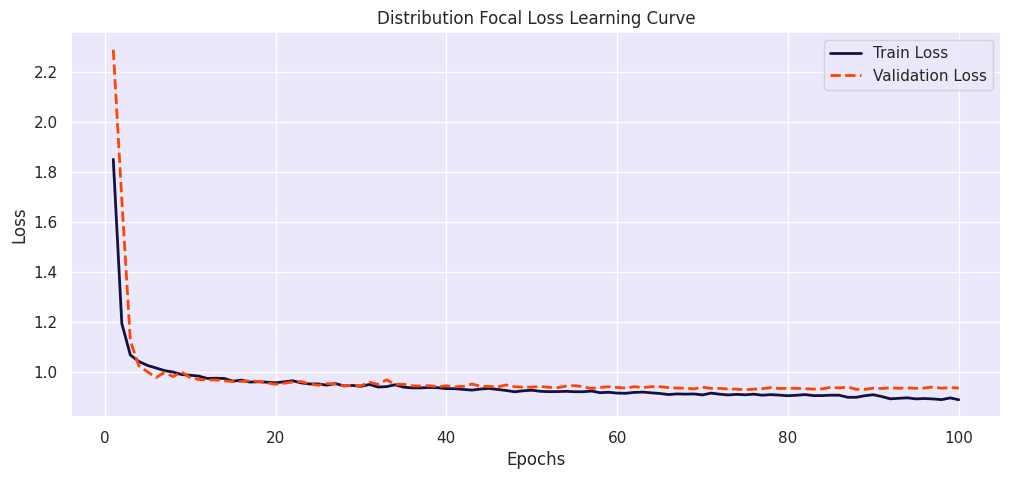

In [12]:
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

In [ ]:
###faster-r-cnn

Using device: cpu
Output image saved as: output_fasterrcnn.jpg
Avg Confidence (Accuracy): 0.79


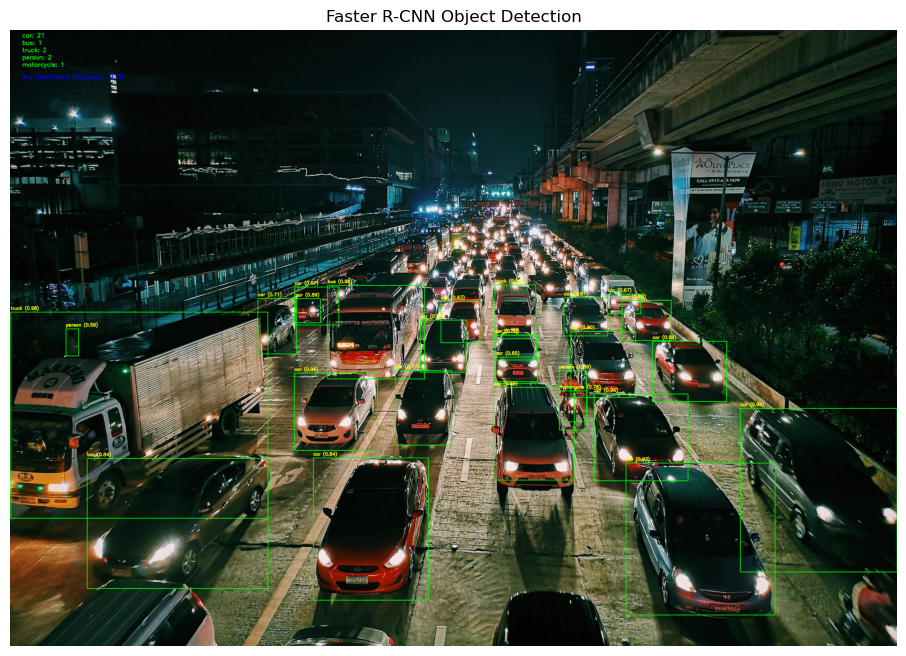

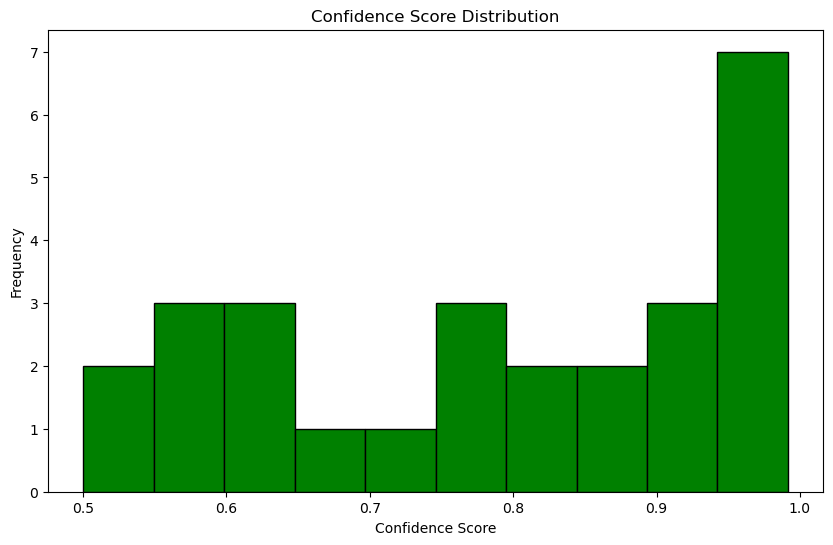

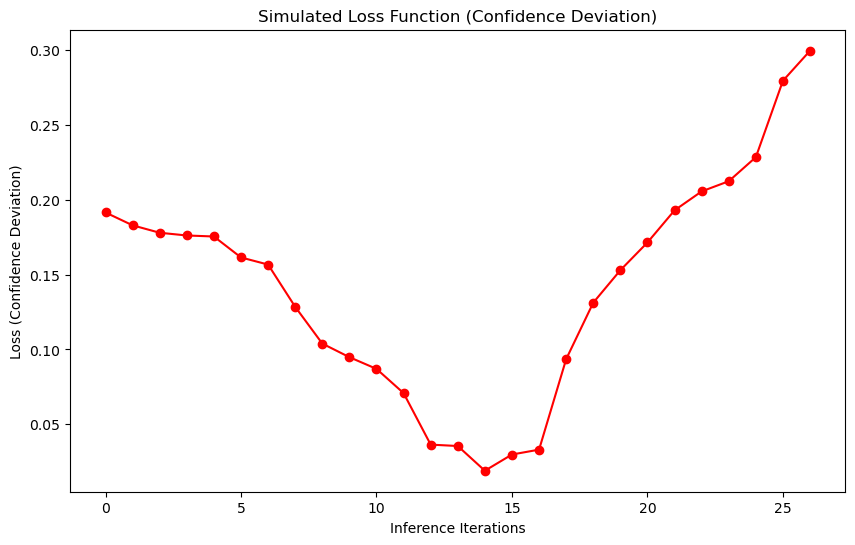

<Figure size 1000x800 with 0 Axes>

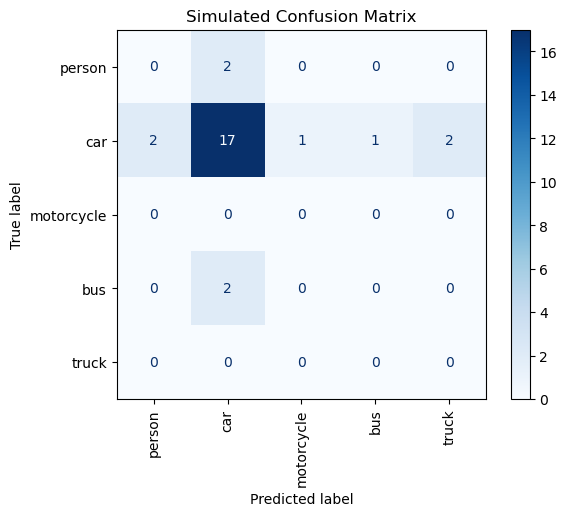

In [1]:
import cv2
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
weights = FasterRCNN_ResNet50_FPN_Weights.COCO_V1
model = fasterrcnn_resnet50_fpn(weights=weights).to(device)
model.eval()
COCO_CLASSES = weights.meta["categories"]
image_path = 'test_videos/sample.jpg'
frame = cv2.imread(image_path)
if frame is None:
    print("Error: Image not found or unable to load.")
    exit()
transform = T.Compose([T.ToPILImage(), T.ToTensor()])
img_tensor = transform(frame).unsqueeze(0).to(device)
with torch.no_grad():
    predictions = model(img_tensor)[0]
boxes = predictions['boxes'].cpu().numpy()
scores = predictions['scores'].cpu().numpy()
labels = predictions['labels'].cpu().numpy()
threshold = 0.5
class_counts = defaultdict(int)
valid_scores = []
loss_values = []
simulated_ground_truth = 0.8
predicted_labels = []
for box, score, label in zip(boxes, scores, labels):
    if score >= threshold:
        valid_scores.append(score)
        predicted_labels.append(label)
        x1, y1, x2, y2 = map(int, box)
        class_name = COCO_CLASSES[label]
        class_counts[class_name] += 1
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"{class_name} ({score:.2f})", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)
        loss = abs(score - simulated_ground_truth)
        loss_values.append(loss)
if valid_scores:
    avg_confidence = np.mean(valid_scores)
    accuracy_text = f"Avg Confidence (Accuracy): {avg_confidence:.2f}"
else:
    avg_confidence = 0
    accuracy_text = "No valid detections (Score >= 0.5)"
y_offset = 30
for class_name, count in class_counts.items():
    cv2.putText(frame, f"{class_name}: {count}", (50, y_offset),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    y_offset += 30
cv2.putText(frame, accuracy_text, (50, y_offset + 20),
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
output_path = "output_fasterrcnn.jpg"
cv2.imwrite(output_path, frame)
print(f"Output image saved as: {output_path}")
print(accuracy_text)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(frame_rgb)
plt.axis('off')
plt.title("Faster R-CNN Object Detection")
plt.show()
if valid_scores:
    plt.figure(figsize=(10, 6))
    plt.hist(valid_scores, bins=10, color='green', edgecolor='black')
    plt.xlabel('Confidence Score')
    plt.ylabel('Frequency')
    plt.title('Confidence Score Distribution')
    plt.show()
if loss_values:
    plt.figure(figsize=(10, 6))
    plt.plot(loss_values, color='red', marker='o')
    plt.xlabel('Inference Iterations')
    plt.ylabel('Loss (Confidence Deviation)')
    plt.title('Simulated Loss Function (Confidence Deviation)')
    plt.show()
if predicted_labels:
    simulated_gt_labels = random.choices(predicted_labels, k=len(predicted_labels))
    unique_labels = sorted(set(predicted_labels + simulated_gt_labels))
    cm = confusion_matrix(simulated_gt_labels, predicted_labels, labels=unique_labels)
    display_labels = [COCO_CLASSES[i] for i in unique_labels]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    plt.figure(figsize=(10, 8))
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title("Simulated Confusion Matrix")
    plt.show()

